### **1. Importações**

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
import datetime as dt
from matplotlib.colors import Normalize

bibliotecas = {
    "Pandas":pd,
    "Numpy":np,
    "Seaborn":sns,
    "Matplotlib":matplotlib}

print(f"{'':-^20} | {'':-^10}")
print(f"{'Biblioteca':^20} | {'Versão':^10}")
print(f"{'':-^20} | {'':-^10}")

for nome, biblioteca in sorted(bibliotecas.items()):
    print(f"{nome:<20} | {biblioteca.__version__:>10}")

-------------------- | ----------
     Biblioteca      |   Versão  
-------------------- | ----------
Matplotlib           |      3.9.0
Numpy                |     1.26.4
Pandas               |      2.2.2
Seaborn              |     0.13.2


In [2]:
base = pd.read_csv("../data/categoria_solanum.csv")
base['Date'] = pd.to_datetime(base['Date'], format="%Y-%m-%d")
base.head()

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),Dia,Mês,Hora,Total,Item Name,Category Name,Dia da semana,Ano
0,2020-07-01,10:01,102900005116509,0.829,4.0,sale,No,1,7,10,3.32,Green Eggplant (1),Solanum,Wednesday,2020
1,2020-07-01,10:02,102900005116509,0.402,4.0,sale,No,1,7,10,1.61,Green Eggplant (1),Solanum,Wednesday,2020
2,2020-07-01,10:07,102900005116509,0.402,4.0,sale,No,1,7,10,1.61,Green Eggplant (1),Solanum,Wednesday,2020
3,2020-07-01,10:09,102900005116509,0.427,4.0,sale,No,1,7,10,1.71,Green Eggplant (1),Solanum,Wednesday,2020
4,2020-07-01,10:12,102900005116257,0.585,6.0,sale,No,1,7,10,3.51,Eggplant (2),Solanum,Wednesday,2020


### **2. Visualizando os produtos mais vendidos no decorrer das horas**
- A % é baseada na porcentagem de vendas total do produto

In [3]:
tabela_vendas_por_hora = base.pivot_table(index='Item Name', columns='Hora', aggfunc='size', fill_value=0)

tabela_vendas_por_hora.columns = [f'{hora}h' for hora in tabela_vendas_por_hora.columns]
total_vendas_por_produto = tabela_vendas_por_hora.sum(axis=1)
percentual_vendas_por_hora = tabela_vendas_por_hora.div(total_vendas_por_produto, axis=0) * 100
percentual_vendas_por_hora = percentual_vendas_por_hora.round(2)
vendidos = pd.DataFrame(base['Item Name'].value_counts())
percentual_vendas_por_hora = pd.merge(percentual_vendas_por_hora, vendidos,how='left', on='Item Name')

percentual_vendas_por_hora.head()

,9h,10h,11h,12h,13h,14h,15h,16h,17h,18h,19h,20h,21h,22h,count
Item Name,,,,,,,,,,,,,,,
Changxianqie,8.87,12.58,10.75,4.69,4.13,4.57,6.60,9.81,9.59,9.84,7.82,7.23,3.44,0.07,5905
Dalong Eggplant,8.43,13.82,9.67,5.56,3.20,4.19,6.89,8.59,10.21,10.21,7.93,8.63,2.66,0.00,2409
Eggplant (1),6.91,11.84,8.22,3.12,3.78,3.29,5.26,5.92,12.01,14.47,6.74,14.31,3.95,0.16,608
Eggplant (2),6.55,11.48,9.77,5.08,3.80,4.64,7.22,9.38,11.31,10.85,8.77,8.13,2.98,0.05,27455
Green Eggplant (1),9.33,13.76,11.33,5.43,3.52,4.48,6.60,8.36,9.90,9.55,7.40,7.25,3.05,0.05,6002


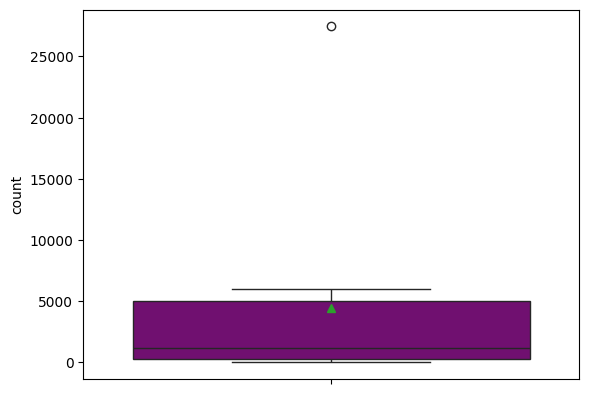

In [4]:
sns.boxplot(percentual_vendas_por_hora['count'], showmeans=True, color='purple')
plt.savefig("../images/03_06_EDA_solanum_01_distribuicao.png")

In [5]:
percentual_vendas_por_hora.describe()

,9h,10h,11h,12h,13h,14h,15h,16h,17h,18h,19h,20h,21h,22h,count
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,8.457000,12.688000,10.065000,3.867000,4.811000,5.699000,5.633000,6.850000,10.987000,10.006000,8.716000,8.929000,3.163000,0.128000,4489.800000
std,6.466857,5.988613,1.865495,2.337188,4.476887,5.742437,2.415943,3.847952,7.076611,4.048065,2.932724,4.429762,1.812335,0.293288,8384.634131
min,0.000000,0.000000,8.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.740000,0.000000,0.000000,0.000000,12.000000
25%,6.640000,11.780000,8.525000,3.247500,3.280000,4.155000,4.810000,6.147500,9.602500,9.622500,7.400000,7.235000,2.740000,0.000000,276.500000
50%,7.925000,12.250000,9.720000,4.320000,3.695000,4.335000,6.600000,8.475000,10.055000,10.040000,7.635000,8.230000,3.235000,0.025000,1190.500000
75%,8.760000,13.805000,10.855000,5.342500,4.047500,4.622500,7.077500,9.347500,11.370000,12.042500,8.560000,11.690000,3.440000,0.065000,5031.000000
max,25.000000,25.000000,14.290000,7.210000,16.670000,21.430000,8.350000,10.360000,28.570000,14.470000,16.670000,15.540000,7.140000,0.950000,27455.000000


In [6]:
percentual_vendas_por_hora

,9h,10h,11h,12h,13h,14h,15h,16h,17h,18h,19h,20h,21h,22h,count
Item Name,,,,,,,,,,,,,,,
Changxianqie,8.87,12.58,10.75,4.69,4.13,4.57,6.60,9.81,9.59,9.84,7.82,7.23,3.44,0.07,5905
Dalong Eggplant,8.43,13.82,9.67,5.56,3.20,4.19,6.89,8.59,10.21,10.21,7.93,8.63,2.66,0.00,2409
Eggplant (1),6.91,11.84,8.22,3.12,3.78,3.29,5.26,5.92,12.01,14.47,6.74,14.31,3.95,0.16,608
Eggplant (2),6.55,11.48,9.77,5.08,3.80,4.64,7.22,9.38,11.31,10.85,8.77,8.13,2.98,0.05,27455
Green Eggplant (1),9.33,13.76,11.33,5.43,3.52,4.48,6.60,8.36,9.90,9.55,7.40,7.25,3.05,0.05,6002
Green Eggplant (2),8.35,11.76,9.11,7.21,2.66,6.07,3.61,6.83,11.39,8.54,7.40,12.71,3.42,0.95,527
Hua Eggplant,3.63,11.92,8.29,3.63,6.74,4.15,4.66,10.36,7.25,12.44,9.84,15.54,1.55,0.00,193
Round Eggplant,0.00,0.00,14.29,0.00,0.00,21.43,7.14,0.00,28.57,14.29,7.14,0.00,7.14,0.00,14
Round Eggplant (1),25.00,25.00,8.33,0.00,16.67,0.00,0.00,0.00,0.00,0.00,16.67,8.33,0.00,0.00,12


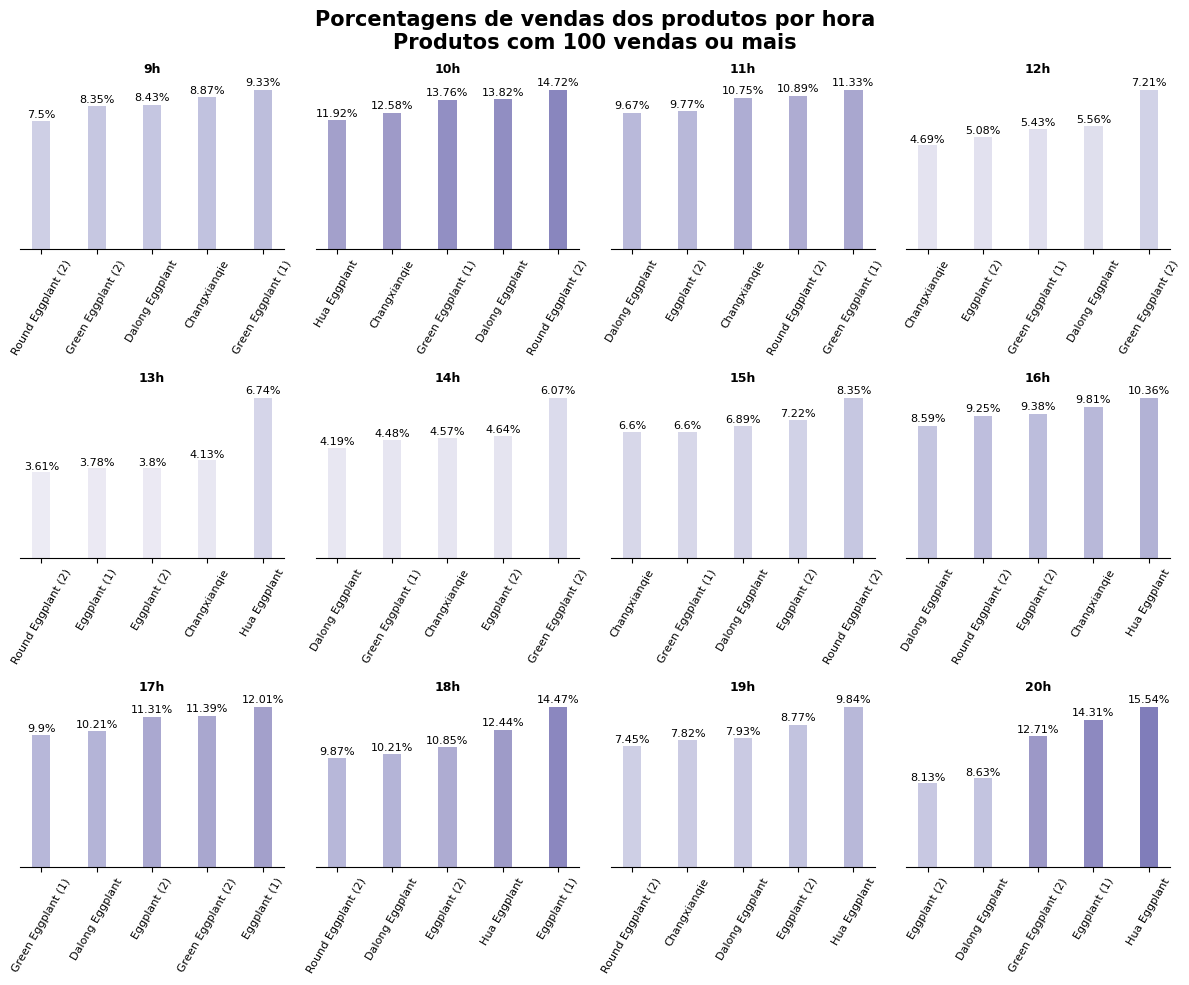

In [7]:
horas = ['9h','10h','11h','12h','13h','14h','15h','16h','17h','18h','19h','20h','21h']

fig,axs = plt.subplots(ncols=4,nrows=3,figsize=(12,10),tight_layout=True)

percentual_vendas_por_hora = percentual_vendas_por_hora.loc[percentual_vendas_por_hora['count'] >=100]

for hora,ax in zip(horas,axs.flat):
    
    b = percentual_vendas_por_hora[hora]
    a = b.sort_values(ascending=False).head(5).sort_values()
    norm = Normalize(vmin=0, vmax=25)
    cmap = plt.get_cmap('Purples')  
    colors = cmap(norm(a.values))
    w = 0.33
    ax.bar(a.index, a.values, color=colors, width=w)
    ax.set_title(f'{hora}', fontweight='bold', fontsize=9)
    ax.spines[['top','left','right']].set_visible(False)
    ax.yaxis.set_visible(False)
    for i in range(0,len(a.index)):
        ax.annotate(f'{a.values[i]}%',(a.index[i],a.values[i]+a.values[i]*0.025),ha='center', fontsize=8)
    ax.set_xticks(a.index)
    ax.set_xticklabels(labels=a.index, rotation=60, fontsize=8)
plt.suptitle("Porcentagens de vendas dos produtos por hora\nProdutos com 100 vendas ou mais", fontsize=15, fontweight='bold')
plt.savefig("../images/03_06_EDA_solanum_02_porcentagem_vendas_produtos.png")
plt.show()

### **3. Analisando as vendas, agrupadas pelo dia da semana**

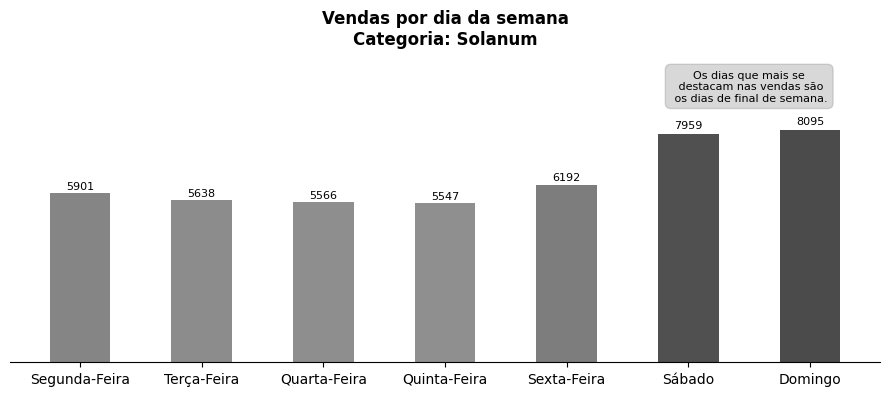

In [8]:
titulos = ['Segunda-Feira','Terça-Feira','Quarta-Feira','Quinta-Feira','Sexta-Feira','Sábado','Domingo']

a = base['Dia da semana'].value_counts().sort_index()
ind = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
a = a.reindex(ind)

fig, ax = plt.subplots(figsize=(9,4), tight_layout=True)
norm = Normalize(vmin=0, vmax=a.values.max()*1.3)
cmap = plt.get_cmap('Greys')
colors = cmap(norm(a.values))

ax.bar(a.index, a.values, color=colors, width=0.5)
ax.spines[['top','right','left']].set_visible(False)
ax.yaxis.set_visible(False)
ax.set_xticks(range(len(a.index)))
ax.set_xticklabels(titulos)

for i in range(0,len(a.index)):
        ax.annotate(a.values[i],(a.index[i],a.values[i]+a.values[i]*0.025),ha='center', fontsize=8)

ax.text(5.5, 9100, "Os dias que mais se\n destacam nas vendas são\n os dias de final de semana.", ha='center',fontsize=8,
        bbox=dict(facecolor='grey', edgecolor='grey', alpha=0.3, boxstyle='round,pad=0.5'))

plt.suptitle("Vendas por dia da semana\nCategoria: Solanum", fontweight='bold', fontsize=12)
plt.savefig("../images/03_06_EDA_solanum_03_vendas_dia_semana.png")
plt.show()

### **4. Visualizando os produtos mais vendidos dessa categoria**

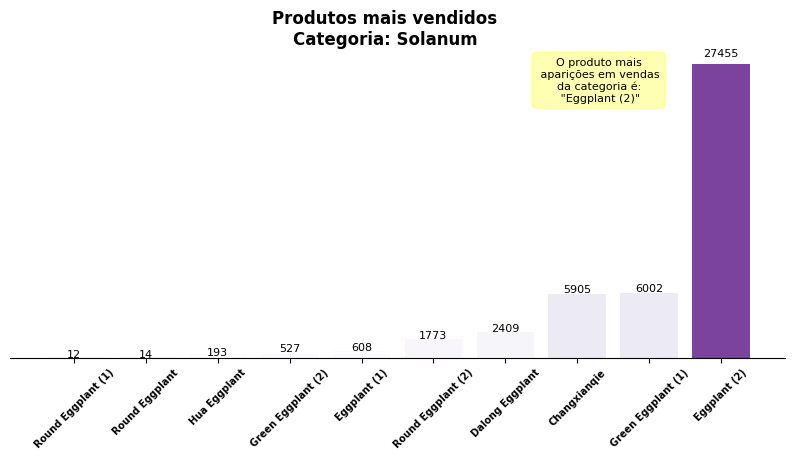

In [9]:
a = base['Item Name'].value_counts().sort_values(ascending=False).head(10).sort_values()

fig, ax = plt.subplots(figsize=(10,4))
norm = Normalize(vmin=0, vmax=a.values.max()*1.5)
cmap = plt.get_cmap('Purples')
colors = cmap(norm(a.values))

ax.bar(a.index, a.values, color=colors)
ax.spines[['top','right','left']].set_visible(False)
ax.yaxis.set_visible(False)
ax.set_xticks(range(len(a.index)))
ax.set_xticklabels(labels=a.index, rotation=45, fontsize=7, fontweight='bold')
ax.bar(a.index[-1],a.values[-1], color='purple',alpha=0.4)

for i in range(0,len(a.index)):
        ax.annotate(a.values[i],(a.index[i],a.values[i]+a.values[i]*0.025),ha='center', fontsize=8)

ax.text(7.3, 24000, f'O produto mais\n aparições em vendas\nda categoria é:\n "{a.index[-1]}"', ha='center',fontsize=8,
        bbox=dict(facecolor='yellow',edgecolor='yellow',alpha=0.3, boxstyle='round,pad=0.5'))
plt.suptitle("Produtos mais vendidos\nCategoria: Solanum", fontweight='bold', fontsize=12)
plt.savefig("../images/03_06_EDA_solanum_04_produtos_mais_vendidos.png")

plt.show()

### **5. Analisando o total arrecadado com as vendas**

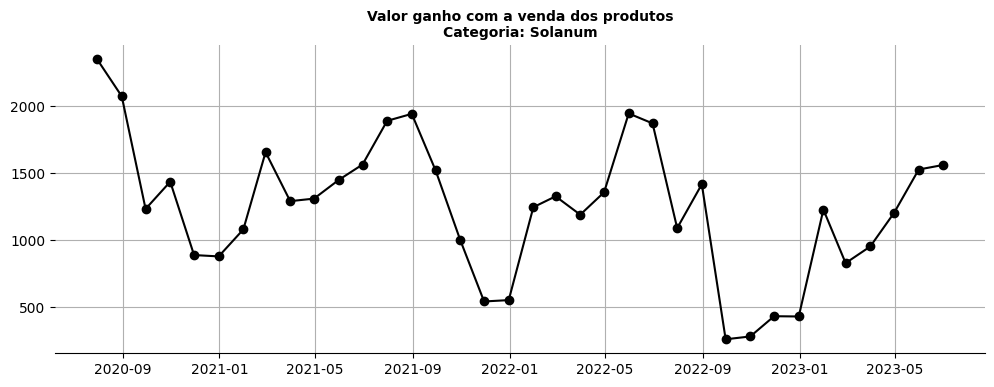

In [10]:
base_sale = base.loc[base['Sale or Return'] == 'sale']
base_datas = base_sale.set_index('Date')
base_datas = base_datas.resample('ME').count()
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(base_datas['Total'], marker='o', color='black')
ax.set_title("Valor ganho com a venda dos produtos\nCategoria: Solanum", fontsize=10, fontweight='bold')
ax.spines[['top','left','right']].set_visible(False)
ax.grid()
plt.savefig("../images/03_06_EDA_solanum_05_valor_ganho_vendas.png")
plt.show()

### **6. Analisando as vendas agrupadas pelos meses**

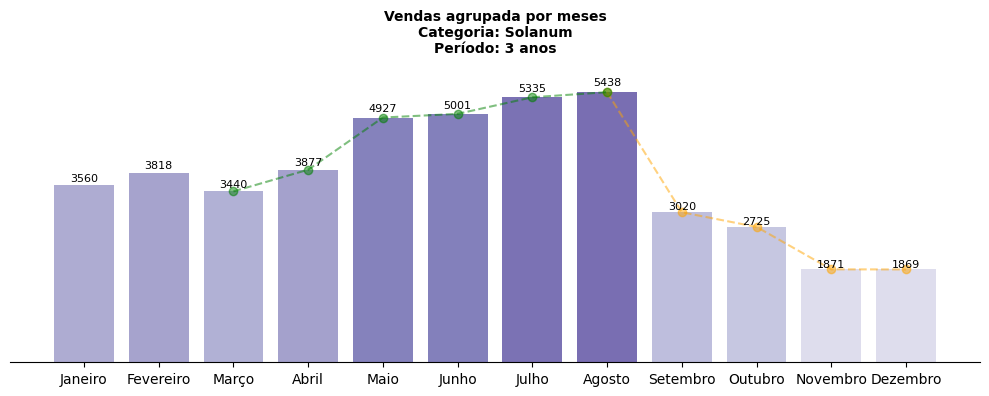

In [11]:
a = base_sale['Mês'].value_counts().sort_index()
meses = ['Janeiro','Fevereiro','Março','Abril','Maio','Junho','Julho','Agosto','Setembro','Outubro','Novembro','Dezembro']

fig, ax = plt.subplots(figsize=(10,4), tight_layout=True)
norm = Normalize(vmin=0, vmax=a.values.max()*1.5)
cmap = plt.get_cmap('Purples')
colors = cmap(norm(a.values))

ax.bar(a.index, a.values, color=colors)
ax.spines[['top','right','left']].set_visible(False)
ax.yaxis.set_visible(False)
ax.set_xticks(range(1,13))
ax.set_xticklabels(meses)

for i in range(0,len(a.index)):
        ax.annotate(a.values[i],(a.index[i],a.values[i]+a.values[i]*0.025),ha='center', fontsize=8)
        
ax.plot(a.index[7:], a.values[7:], '--', color='orange',marker='o', alpha=0.5)
ax.plot(a.index[2:8], a.values[2:8], '--', color='green',marker='o', alpha=0.5)

plt.suptitle("Vendas agrupada por meses\nCategoria: Solanum\nPeríodo: 3 anos", fontweight='bold', fontsize=10)
plt.savefig("../images/03_06_EDA_solanum_06_vendas_meses.png")
plt.show()

### **7. Analisando as vendas agrupadas pelo ano e mês**

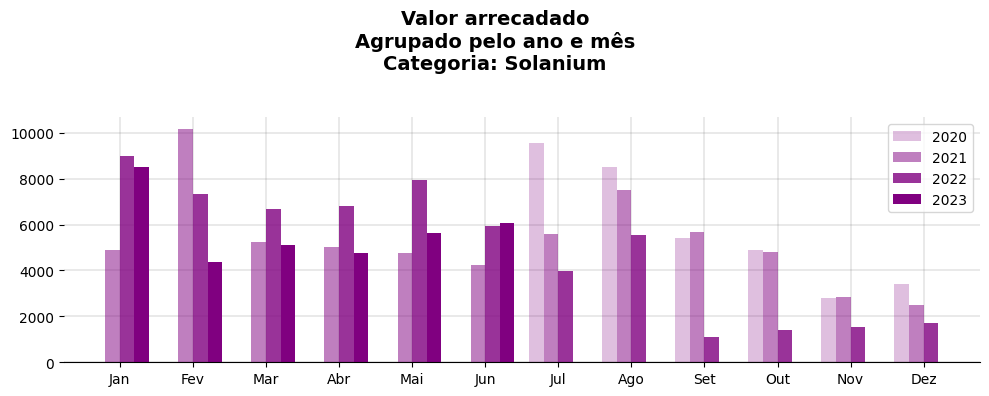

In [12]:
a = base_sale.groupby(["Ano","Mês"])['Total'].sum().reset_index()

meses = ['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez']

vinte = a.loc[a.Ano == 2020]
vinteeum = a.loc[a.Ano == 2021]
vinteedois = a.loc[a.Ano == 2022]
vinteetres = a.loc[a.Ano == 2023]

fig, ax = plt.subplots(figsize=(10,4), tight_layout=True)

w = 0.2
ax.grid()
ax.bar(vinte['Mês']-w-w/2, vinte['Total'], color="purple", width=w, label="2020", alpha=0.25)
ax.bar(vinteeum['Mês']-w/2, vinteeum['Total'], color="purple", width=w, label="2021", alpha=0.5)
ax.bar(vinteedois['Mês']+w/2, vinteedois['Total'], color="purple", width=w, label="2022", alpha=0.8)
ax.bar(vinteetres['Mês']+w+w/2, vinteetres['Total'], color="purple", width=w, label="2023", alpha=1)
ax.spines[['top','right','left']].set_visible(False)
ax.legend()
ax.set_xticks(range(1,13))
ax.set_xticklabels(meses)
ax.grid(linewidth=0.25, color='grey')
ax.set_axisbelow(True)

plt.suptitle("Valor arrecadado\nAgrupado pelo ano e mês\nCategoria: Solanium\n", fontweight='bold', fontsize=14)
plt.savefig("../images/03_06_EDA_solanum_07_vendas_ano_mes.png")
plt.show()

### **8. Analisando os dois produtos com maiores taxas de perdas**

In [13]:
produtos_categoria = base['Item Name'].unique()

taxa_perdas = pd.read_csv("../data/annex4.csv")
taxa_perdas = taxa_perdas.loc[taxa_perdas['Item Name'].isin(produtos_categoria)]

In [14]:
taxa_perdas.sort_values(by='Loss Rate (%)', ascending=False).head(3)

,Item Code,Item Name,Loss Rate (%)
85,102900011009444,Dalong Eggplant,10.94
194,102900011033975,Green Eggplant (2),9.43
195,102900011033982,Eggplant (1),9.43


#### **8.1. Dalong Eggplant**

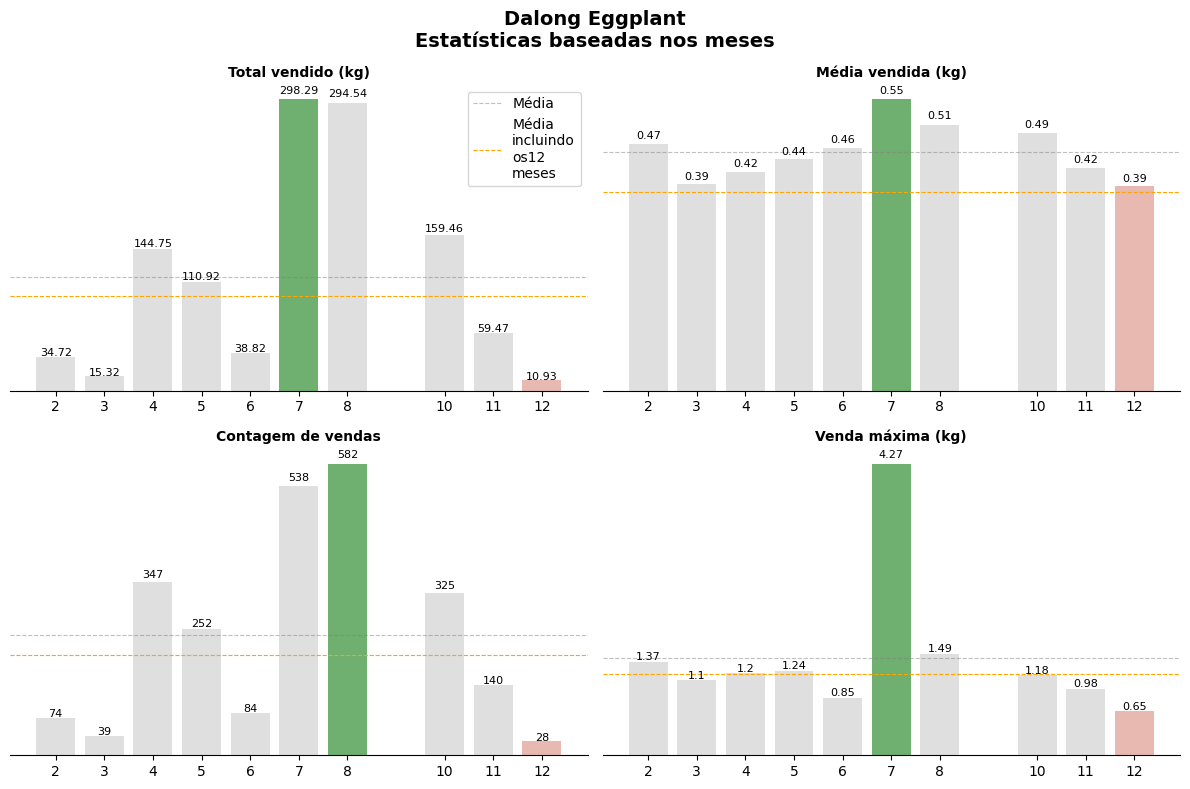

In [15]:
import sys 
sys.path.append("../functions/")
from funcoes import estatisticas_produto

estatisticas_produto(base, "Dalong Eggplant", salvar=True,
                     salvar_como="03_06_EDA_solanum_08_dalong_eggplant_1")

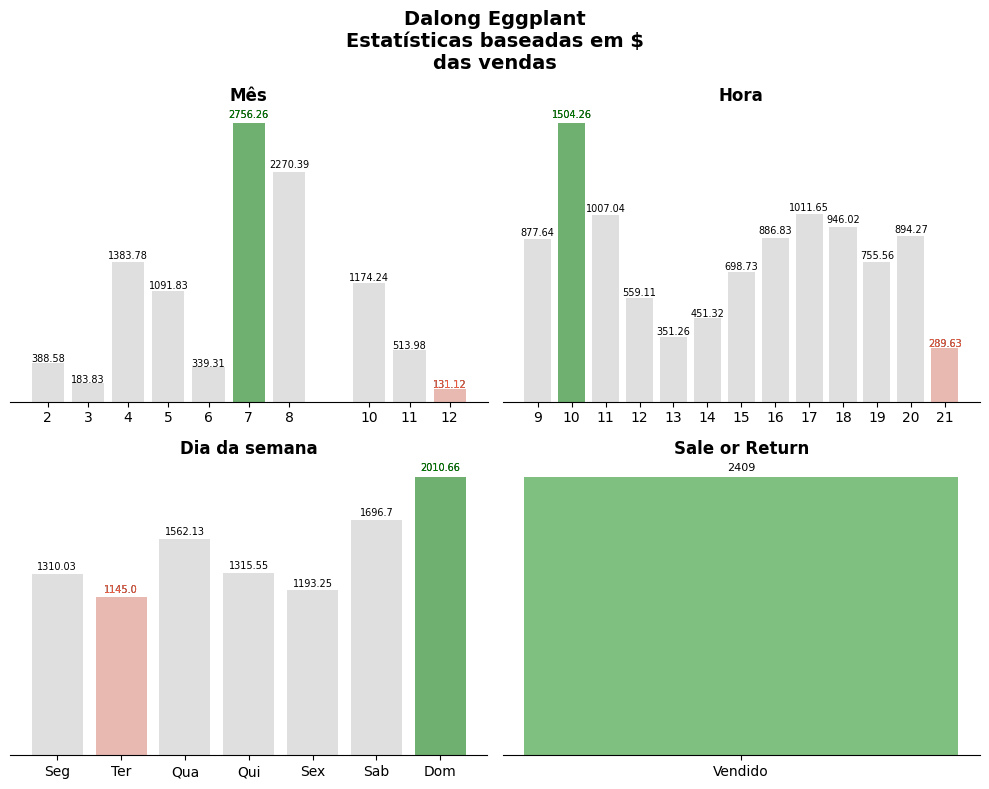

In [16]:
sys.path.append('../functions/')
from funcoes import estatisticas_produto_dois

estatisticas_produto_dois(base, "Dalong Eggplant", salvar=True,
                     salvar_como="03_06_EDA_solanum_09_dalong_eggplant_2")

#### **8.2. Green Eggplant (2)**

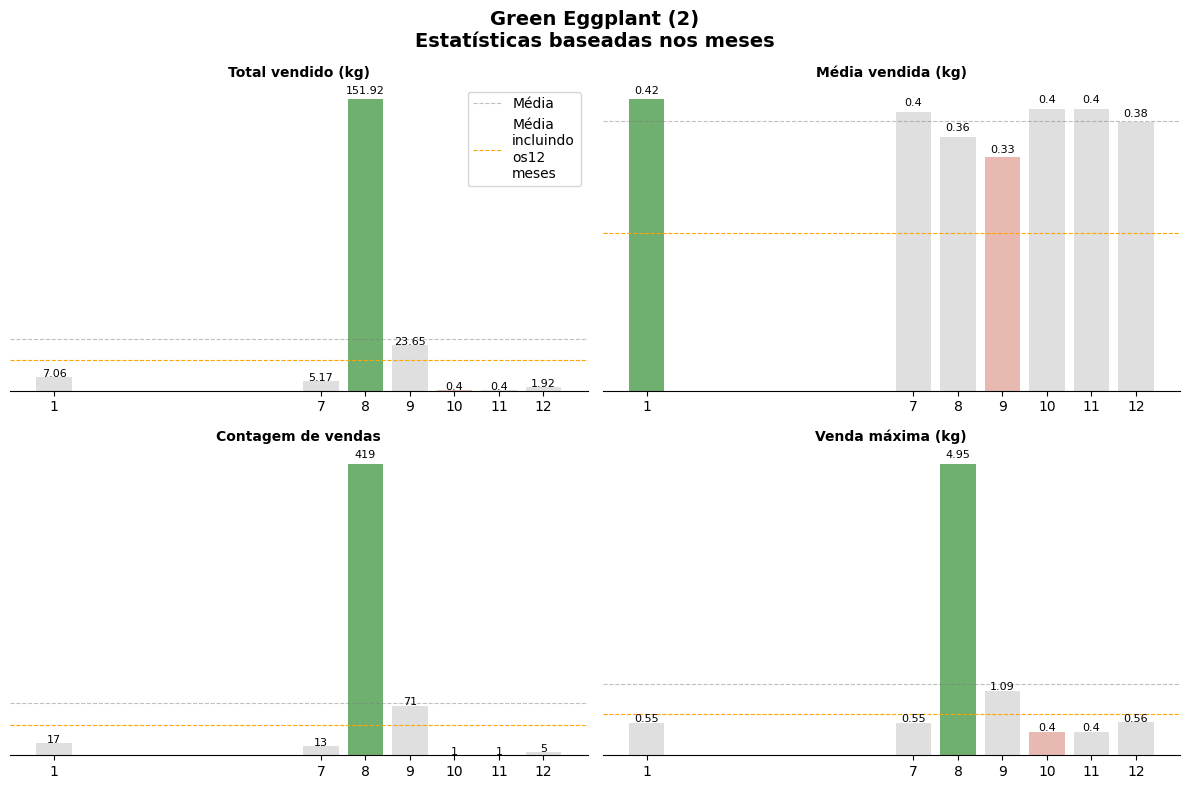

In [17]:
estatisticas_produto(base, "Green Eggplant (2)", salvar=True,
                     salvar_como="03_06_EDA_solanum_10_green_eggplant_2_1")

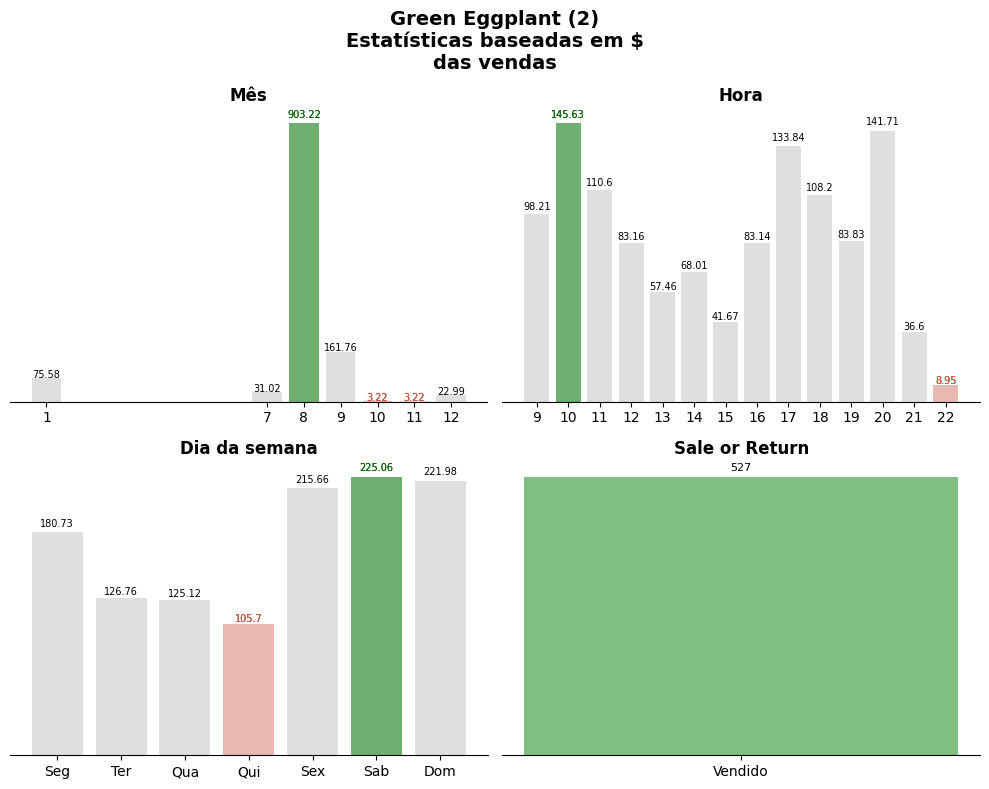

In [18]:
estatisticas_produto_dois(base, "Green Eggplant (2)", salvar=True,
                     salvar_como="03_06_EDA_solanum_11_green_eggplant_2_2")